Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):

#name - ASCII subject name and recording number

#MDVP:Fo(Hz) - Average vocal fundamental frequency

#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

#MDVP:Flo(Hz) - Minimum vocal fundamental frequency

#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 

#measures of variation in fundamental frequency

#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

#NHR,HNR - Two measures of ratio of noise to tonal components in the voice

#status - Health status of the subject (one) - Parkinson's, (zero) - healthy

#RPDE,D2 - Two nonlinear dynamical complexity measures

#DFA - Signal fractal scaling exponent

#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [67]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

### Q1. Load the dataset 

In [3]:
df = pd.read_csv('parkinsons.csv')
df.head() 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [5]:
df.describe(include = 'number')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


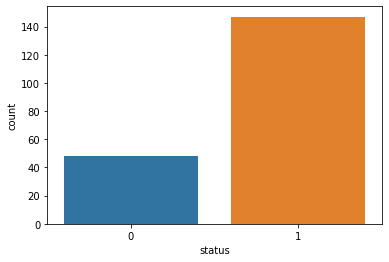

In [7]:
sns.countplot(df['status'])
plt.show()

In [ ]:
# people with Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [15]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

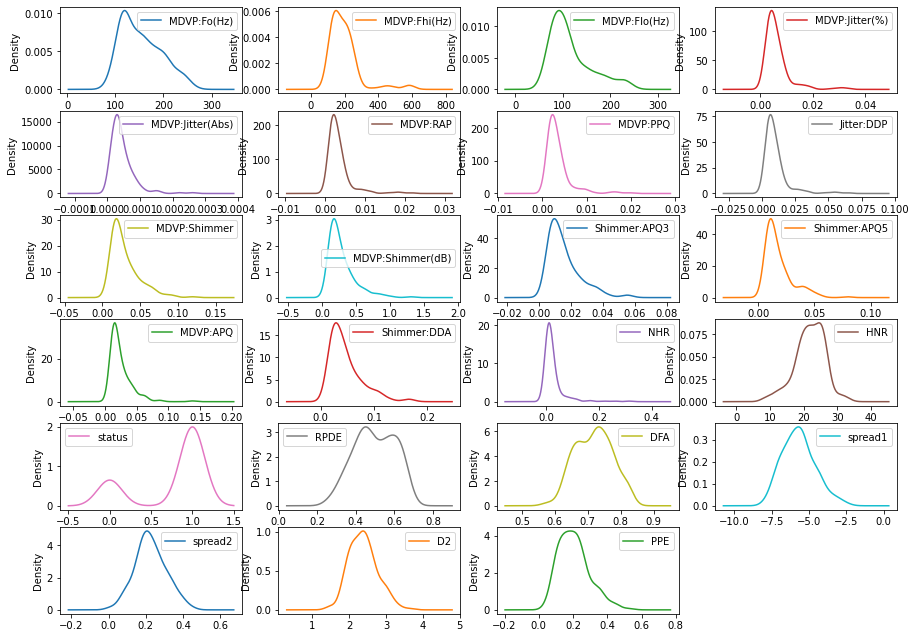

In [13]:
df.plot(kind = 'kde',subplots = True, layout =[8,4],sharex =False, figsize = [15,15])
plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

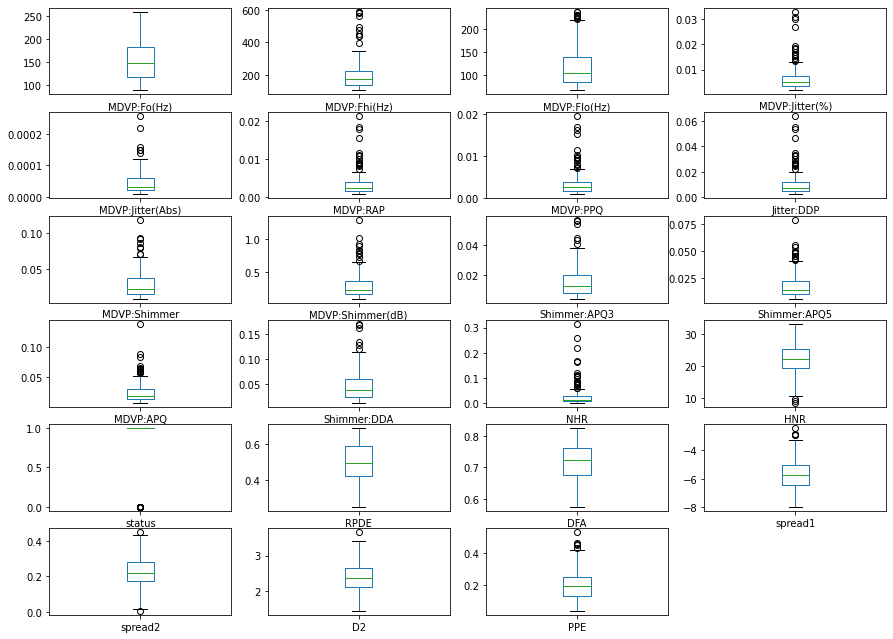

In [14]:
df.plot(kind = 'box',subplots = True, layout =[8,4],sharex =False, figsize = [15,15])
plt.show()

### Q7. Are there any strong correlations among the independent features?

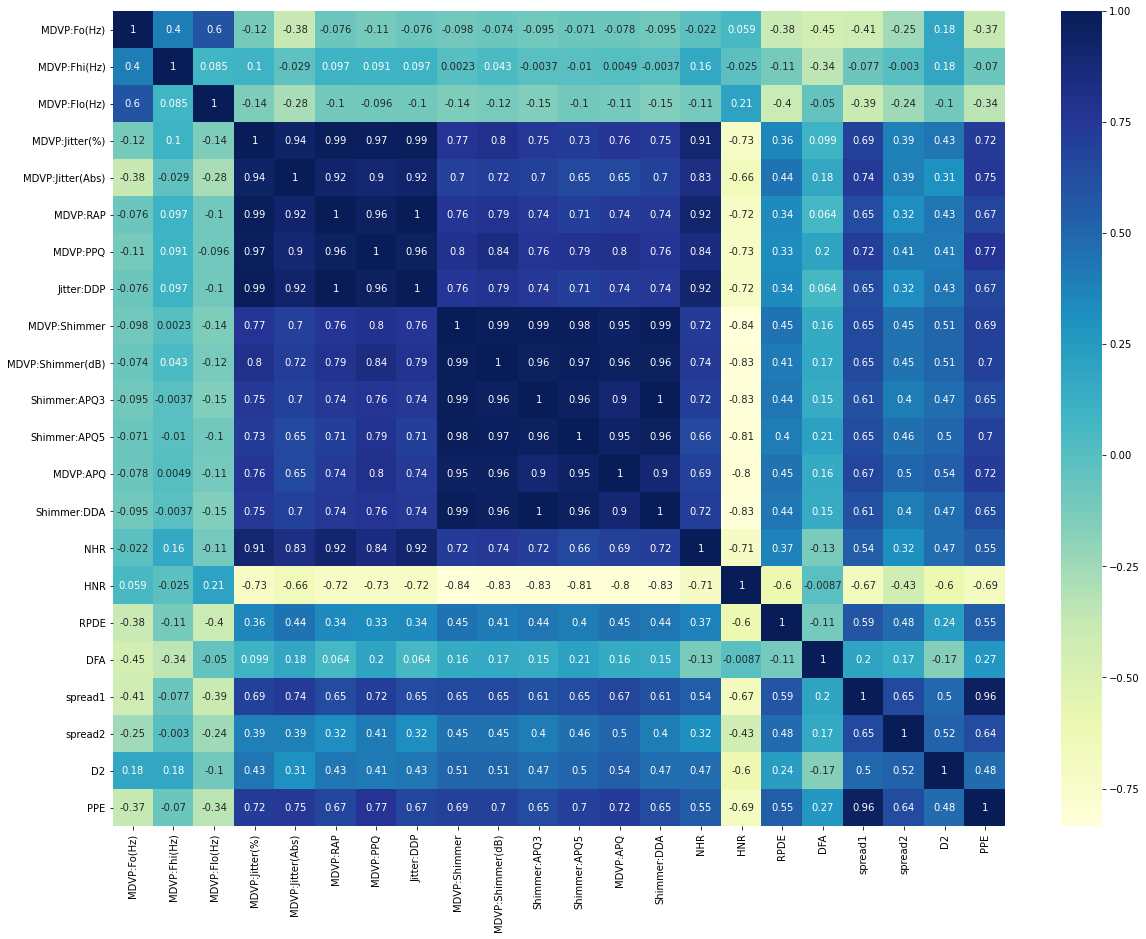

In [23]:
df_features = df.drop(['status'],1)
plt.figure(figsize = [20,15])
sns.heatmap(df_features.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

### Q8. Split dataset into training & test dataset  

In [38]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop(['status','name'],1)
y = df['status']

In [42]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, train_size = 0.7,random_state = 10)

### Q9. Create a default decision tree model using criterion = Entropy 

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
def get_train_report(model):

    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

In [60]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
      
    correct_classified= (TP+TN)/(TN+TP+FP+FN)*100
    misclassified=(FP+FN)/(TN+TP+FP+FN)*100
    precision = TP/(TP+FP)
    recall = TP/(FN+TP)
    specificity = TN/(TN+FP)
    f1score = 2*((precision*recall)/(precision+recall))
    
    
    print('TN =',TN)
    print('TP =',TP)
    print('FP =',FP)
    print('FN =',FN)
    print('misclassified',misclassified)
    print('correct_classified',correct_classified)
    print('precision',precision)
    print('recall/Sensitivity/TPR : ',recall)
    print('f1score',f1score)
    print('specificity/TNR :',specificity)

In [61]:
def plot_roc(model):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')
    
    plt.title('ROC curve for Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))

    plt.grid(True)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

dt = dt_class.fit(X_train, y_train)

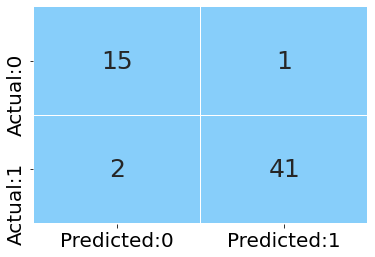

TN = 15
TP = 41
FP = 1
FN = 2
misclassified 5.084745762711865
correct_classified 94.91525423728814
precision 0.9761904761904762
recall/Sensitivity/TPR :  0.9534883720930233
f1score 0.9647058823529412
specificity/TNR : 0.9375


In [68]:
plot_confusion_matrix(dt)

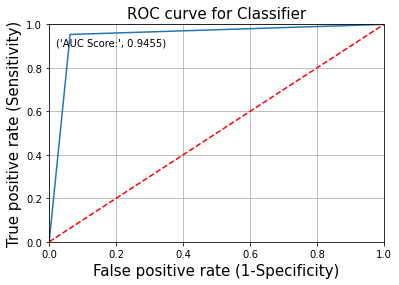

In [72]:
plot_roc(dt)

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [69]:
from sklearn.model_selection import GridSearchCV

In [88]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10)}]

dt_classification = DecisionTreeClassifier(random_state = 42)

tree_grid = GridSearchCV(estimator =dt_classification ,param_grid =tuned_paramaters,cv =5 )

tree_grid_model = tree_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',tree_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 2}


In [89]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_['criterion'],
                                 max_depth = tree_grid_model.best_params_['max_depth'],
                                 max_features = tree_grid_model.best_params_['max_features'],
                                 min_samples_split = tree_grid_model.best_params_['min_samples_split'],random_state = 42)

dt_model = dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

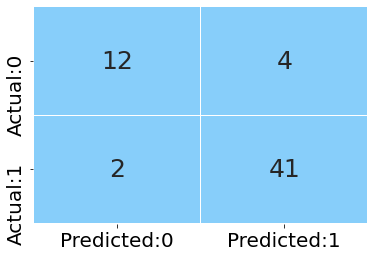

TN = 12
TP = 41
FP = 4
FN = 2
misclassified 10.16949152542373
correct_classified 89.83050847457628
precision 0.9111111111111111
recall/Sensitivity/TPR :  0.9534883720930233
f1score 0.9318181818181819
specificity/TNR : 0.75


In [90]:
plot_confusion_matrix(dt_model)

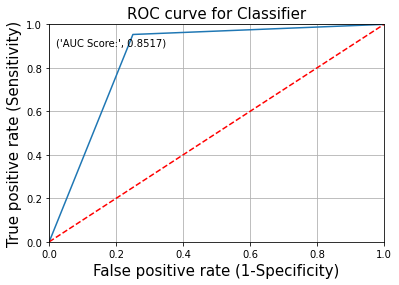

In [91]:
plot_roc(dt_model)

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf_class = RandomForestClassifier(criterion = 'entropy', random_state = 10)

rf = rf_class.fit(X_train, y_train)

In [95]:
tuned_paramaters = [{'n_estimators': [10,20,50,80,100]}]

dt_class = RandomForestClassifier(random_state = 42)

rf_grid = GridSearchCV(estimator =dt_class ,param_grid =tuned_paramaters,cv =5 )

rf_grid_model = rf_grid.fit(X_train,y_train)

print('Best parameters for Desicion Tree Classifier : ',rf_grid_model.best_params_)

Best parameters for Desicion Tree Classifier :  {'n_estimators': 50}


In [97]:
rf_model = RandomForestClassifier(n_estimators =rf_grid_model.best_params_['n_estimators'],random_state = 42)

rf_model = rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

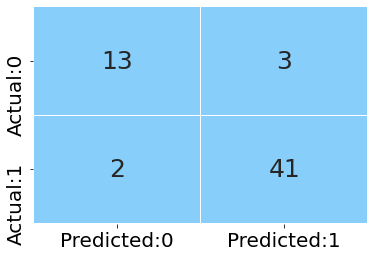

TN = 13
TP = 41
FP = 3
FN = 2
misclassified 8.47457627118644
correct_classified 91.52542372881356
precision 0.9318181818181818
recall/Sensitivity/TPR :  0.9534883720930233
f1score 0.942528735632184
specificity/TNR : 0.8125


In [98]:
plot_confusion_matrix(rf_model)

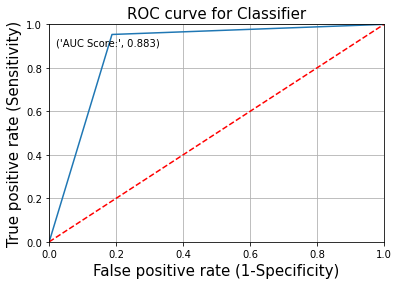

In [99]:
plot_roc(rf_model)